In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease/heart.csv


<!DOCTYPE html>
<html>
<head>
  <title></title>
</head>
<body style="text-align: center;">
  <h1 style="background-color: white; color: green; padding: 10px; border-radius: 5px; display: inline-block;">
    Heart Diseases: What are the indicators?
  </h1>
</body>
</html>


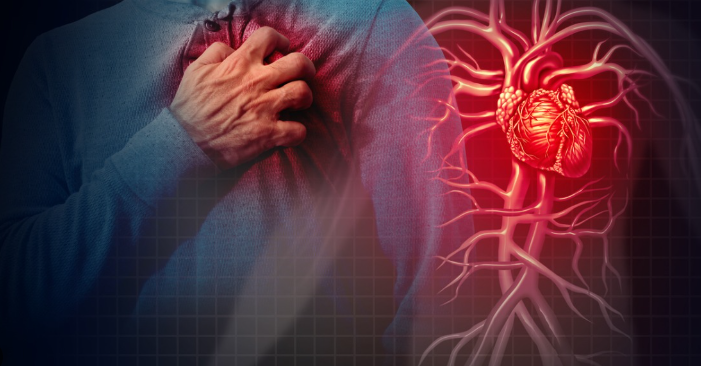

**Heart disease, also referred as cardiovascular diseases, is broad term used for diseases and conditions affecting the heart and circulatory system. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to heart failure and heart attack.**

<!DOCTYPE html>
<html>
<head>
  
</head>
<body style="text-align: center;">

  <h1 style="background-color: white; color: green; padding: 10px; border-radius: 5px; display: inline-block;">
    Heart Diseases: What are the indicators?
  </h1>

  <p style="background-color: yellow; color: black; padding: 15px; border-radius: 8px; max-width: 800px; margin: 20px auto; text-align: justify; font-size: 16px;">
    <b>
      Heart disease, also referred as cardiovascular diseases, is broad term used for diseases and conditions 
      affecting the heart and circulatory system. It is a major cause of disability all around the world. 
      Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of 
      the body as well. There are several different types and forms of heart diseases. The most common ones 
      cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, 
      enlargement in the size of heart and several others leading to heart failure and heart attack.
    </b>
  </p>

</body>
</html>


<!DOCTYPE html>
<html>
<head>
</head>
<body style="font-family: Arial, sans-serif; line-height: 1.6;">

  <h1 style="background-color: white; color: black; padding: 10px; border-radius: 5px; text-align: center; display: inline-block; margin: 20px auto;">
    Key Facts on Heart Disease (WHO, 2025)
  </h1>

  <ul style="background-color: black; color: white; padding: 20px; border-radius: 8px; max-width: 800px; margin: 20px auto; font-size: 16px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
    <li>Cardiovascular diseases (CVDs) remain the <b>leading cause of death worldwide in 2025</b>.</li>
    <li>Each year, nearly <b>18 million people</b> die from CVDs — about <b>1 in every 3 deaths globally</b>. A large majority are due to heart attack and stroke.</li>
    <li>More than <b>three-quarters</b> of these deaths still occur in low- and middle-income countries.</li>
    <li>Among all premature deaths (under age 70) from noncommunicable diseases, almost <b>40%</b> are linked to cardiovascular diseases.</li>
    <li>Most CVDs can be prevented by tackling risk factors like tobacco use, unhealthy diets, obesity, lack of physical activity, and harmful use of alcohol.</li>
    <li>Early detection and timely treatment in 2025 — with counselling, medicines, and lifestyle changes — remain the best ways to reduce complications and save lives.</li>
  </ul>

</body>
</html>


# Objectives
This notebook has two main objectives:

Explore the heart disease dataset using exploratory data analysis (EDA)
Exercise with classification algorithms for prediction (modelling)

#  Table of Contents
0. Introduction  
1. Exploratory Data Analysis  
   1.1 Data Dictionary  
   1.2 Data Pre-processing  
   1.3 Exploring Features  
   1.4 Correlations Heatmap  
   1.5 EDA Summary  
2. Predictions  
   2.1 Scikit Learn Classifiers  
   2.2 Catboost, Lgbm and Xgboost  
   2.3 Model Explainablity  
3. Concluding Remarks  
4. Reference  



# 1. Exploratory Data Analysis

<h1 style="
    background-color: white; 
    color: #1f8f4a; /* bold green accent */
    padding: 14px 20px; 
    border-radius: 10px; 
    text-align: center; 
    display: inline-block; 
    margin: 20px auto; 
    font-size: 32px; 
    font-weight: 700; 
    box-shadow: 0 6px 18px rgba(31,143,74,0.15);
    border-bottom: 4px solid #1f8f4a;
">
   Exploratory Data Analysis
</h1>


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease/heart.csv


In [3]:
data = pd.read_csv('/kaggle/input/heart-disease/heart.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (303, 14)


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Note: From the data types we see that all features are int64/float64. But that is because some of the categorical features including the target (has disease/no disease) are already label encoded for us. We will, in the section below, see a detailed decreption of the features.

<section id="data-dict">
  <h3>1.1 Data Dictionary</h3>
  <p>Description of each feature in the dataset:</p>

  <table border="1" cellpadding="8" cellspacing="0">
    <thead>
      <tr>
        <th>Feature</th>
        <th>Description / Values</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>age</td>
        <td>Age in years</td>
      </tr>
      <tr>
        <td>sex</td>
        <td>1 = male, 0 = female</td>
      </tr>
      <tr>
        <td>cp</td>
        <td>
          Chest pain type<br>
          0 = typical angina<br>
          1 = atypical angina<br>
          2 = non-anginal pain<br>
          3 = asymptomatic
        </td>
      </tr>
      <tr>
        <td>trestbps</td>
        <td>Resting blood pressure (mm Hg on admission)</td>
      </tr>
      <tr>
        <td>chol</td>
        <td>Serum cholesterol in mg/dl</td>
      </tr>
      <tr>
        <td>fbs</td>
        <td>Fasting blood sugar > 120 mg/dl: 1 = true, 0 = false</td>
      </tr>
      <tr>
        <td>restecg</td>
        <td>
          Resting ECG results<br>
          0 = normal<br>
          1 = ST-T wave abnormality<br>
          2 = probable/definite left ventricular hypertrophy
        </td>
      </tr>
      <tr>
        <td>thalach</td>
        <td>Maximum heart rate achieved</td>
      </tr>
      <tr>
        <td>exang</td>
        <td>Exercise induced angina: 1 = yes, 0 = no</td>
      </tr>
      <tr>
        <td>oldpeak</td>
        <td>ST depression induced by exercise relative to rest</td>
      </tr>
      <tr>
        <td>slope</td>
        <td>
          Slope of peak exercise ST segment<br>
          0 = upsloping<br>
          1 = flat<br>
          2 = downsloping
        </td>
      </tr>
      <tr>
        <td>ca</td>
        <td>Number of major vessels (0–3) colored by fluoroscopy</td>
      </tr>
      <tr>
        <td>thal</td>
        <td>
          0 = error (maps to NaN)<br>
          1 = fixed defect<br>
          2 = normal<br>
          3 = reversible defect
        </td>
      </tr>
      <tr>
        <td>target</td>
        <td>
          0 = no disease, 1 = disease<br>
          Diagnosis (angiographic disease status):<br>
          0 = &lt;50% diameter narrowing, 1 = &gt;50% diameter narrowing
        </td>
      </tr>
    </tbody>
  </table>

  <p>
    <strong>Note on faulty data:</strong><br>
    - Data #93, 159, 164, 165, 252 have ca=4 (incorrect, originally NaN).<br>
    - Data #49, 282 have thal=0 (incorrect, originally NaN).<br>
    <strong>Action:</strong> Drop these 7 faulty entries.
  </p>
</section>


In [6]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 296 instead of 303!


1.2.2 Rename columns for the sake of clarity
The feature names in the dataset are abbreviated and hard to understand their meaning. A full medical/technical name is hard enough to understand for most of us let alone their short form. So to make them a little bit easier to read we will, here under, change the column names of the data frame using information from the UCL data repository.
We'll also replace the coded categories (0, 1, 2,..) to their medical meaning ('atypical angina', 'typical angina', etc. for example)
Note: I borrowed Rob Harrand's idea of re-naming the columns

In [7]:
data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [8]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [9]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [10]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


1.2.3 Grouping Features (by data type)
As we have seen above there are three datatypes i.e object, int and floats. Let's group them according to type.

In [11]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

1.3 Exploring Features/Target 
In this section we'll investigate all the features (including the target) in detail. We will look at the statistical summary when possible and the distributions of some of them as well, starting from the target.

1.3.1 Target distribution
We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.

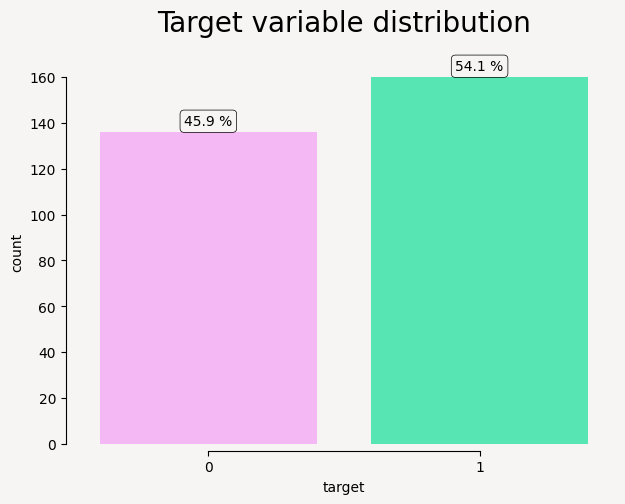

In [12]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

1.3.2 Numerical Features
Statistical summary
For the numerical features we can apply the handy pandas data.describe() method and get the global statistical summary. Key figures are highlighted below.

In [13]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0



<section id="stat-summary">
  <h3>Statistical Summary of Numerical Features</h3>

  <table border="1" cellpadding="8" cellspacing="0" style="width:100%; margin-bottom:16px;">
    <thead>
      <tr style="background-color:#f3f3f3;">
        <th>Feature</th>
        <th>Mean / Avg</th>
        <th>Minimum</th>
        <th>Maximum</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Age (years)</td>
        <td>54.5</td>
        <td>29</td>
        <td>77</td>
      </tr>
      <tr>
        <td>Cholesterol (mg/dl)</td>
        <td>247.15</td>
        <td>126</td>
        <td>564</td>
      </tr>
      <tr>
        <td>Resting blood pressure (mm Hg)</td>
        <td>131</td>
        <td>94</td>
        <td>200</td>
      </tr>
      <tr>
        <td>Maximum heart rate achieved (bpm)</td>
        <td>149.5</td>
        <td>71</td>
        <td>202</td>
      </tr>
      <tr>
        <td>ST depression (ST_depression)</td>
        <td>1.06</td>
        <td>0</td>
        <td>6.2</td>
      </tr>
      <tr>
        <td>Number of major blood vessels (ca)</td>
        <td>0.68</td>
        <td>0</td>
        <td>3</td>
      </tr>
    </tbody>
  </table>

  <p>
    <strong>Note on Cholesterol:</strong> According to <a href="#ref6">[6]</a>, a healthy cholesterol level is < 200 mg/dl. Usually, high cholesterol is associated with heart disease.
  </p>
</section>


Distribution: Density plots

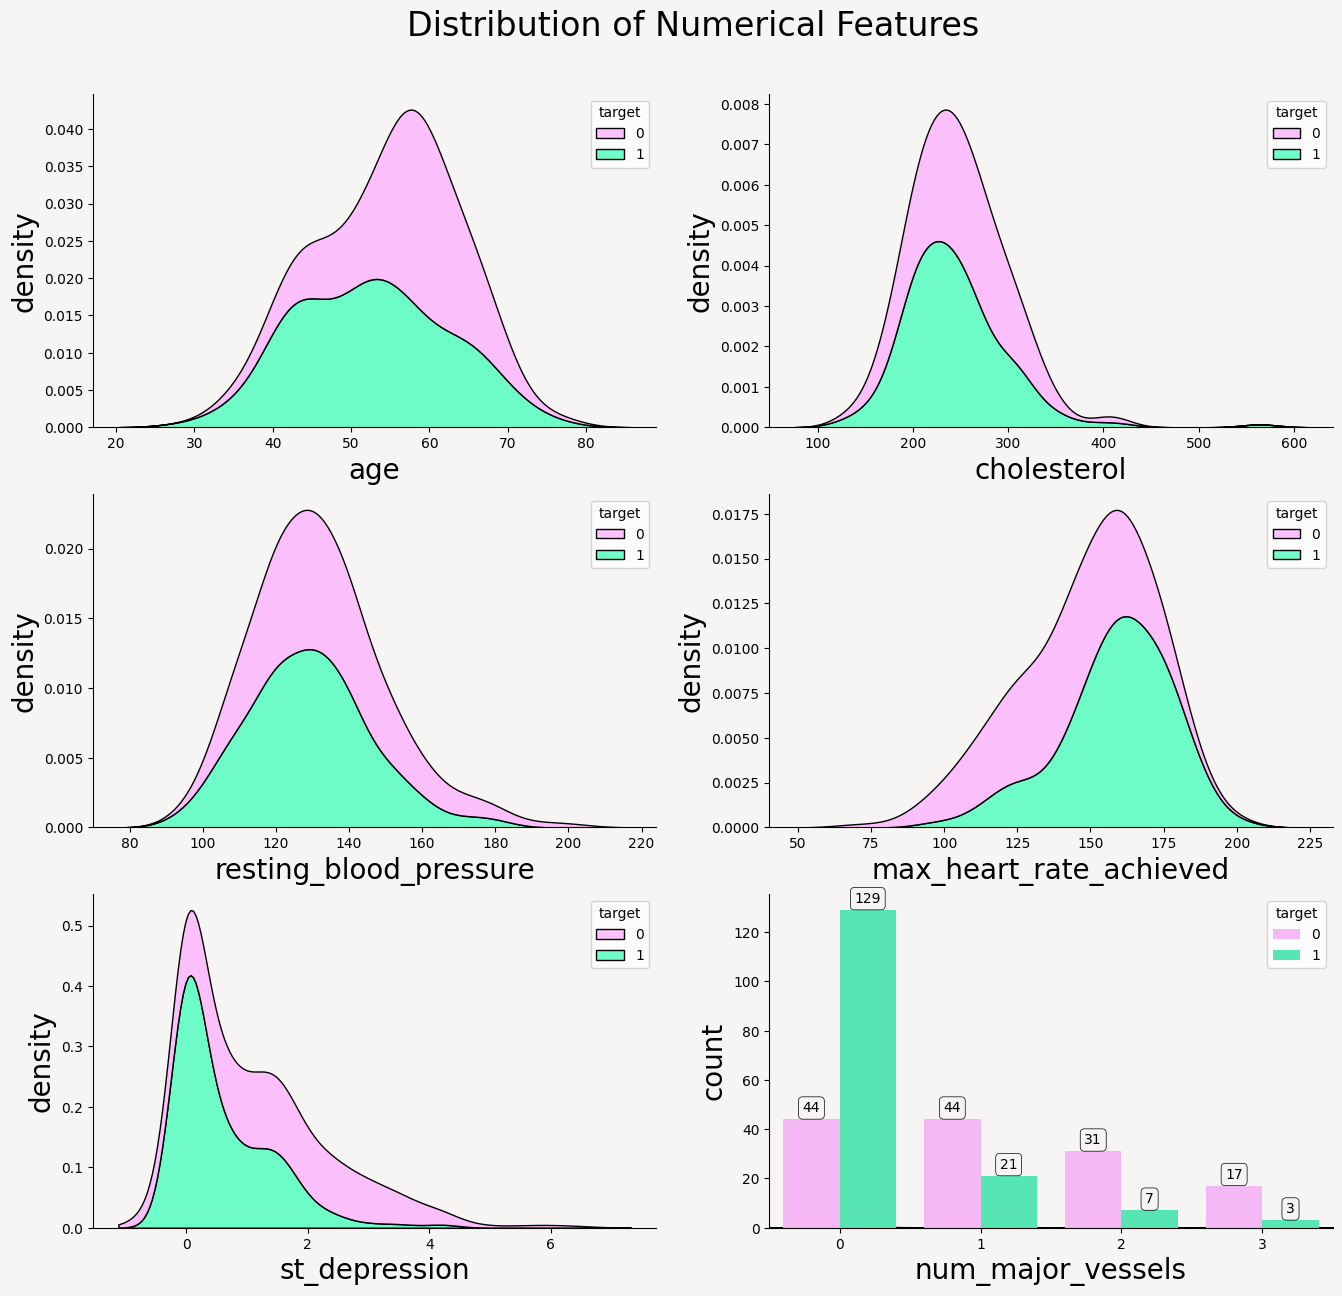

In [14]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);

Pair-plots

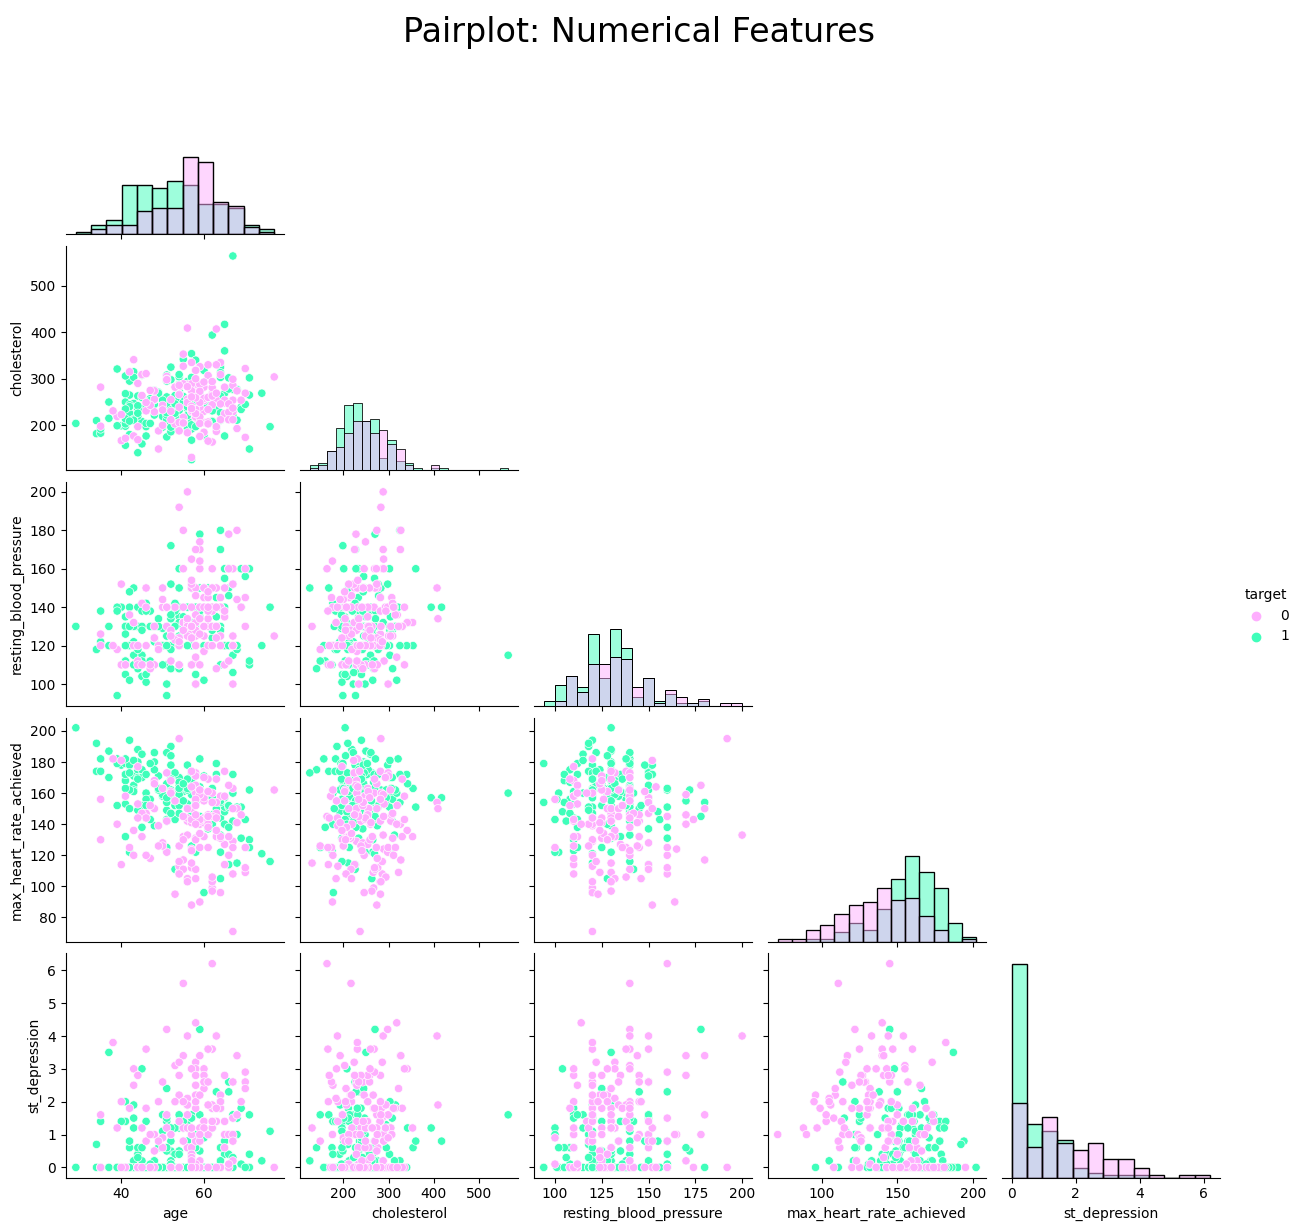

In [15]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

Selected Features
Below are reg-plots of some selected features showing the linear relation with Age, similar to the first column in the pair-plot above. We observe that:

Except maximum_heart_rate_achieved, the others are positively and linearly related with age (albeit a weaker relation with st_depression).
Younger patients with higher maximum_heart_rate_achieved are more likely to have a heart condition.
Lower st_depression regardless of age is also likely an indication of a heart disease.

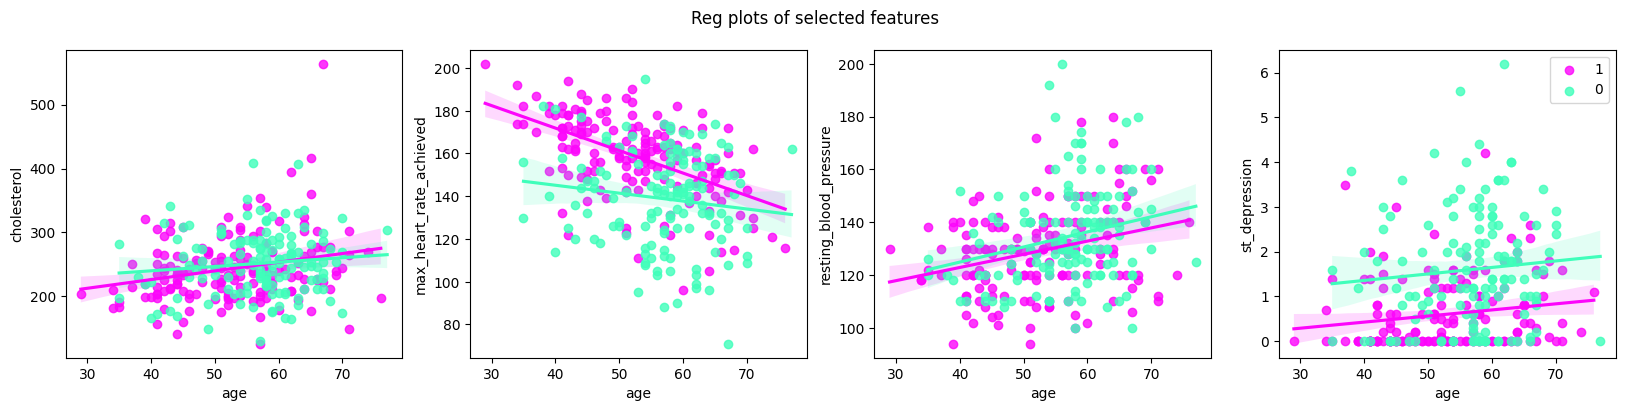

In [16]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

1.3.3 Categorical Features
We use a count plot to visualize the different categories with respect to the target variable. Two things we could take note of are the distribution of each category in the dataset and their contribution to the probability of correct prediction of the target variable, i.e has disease (=1) or has no disease (=0). Below is the summary of the categorical features

<section id="exploring-features">
  <h3>1.3 Exploring Features</h3>

  <div>
    <h4>Chest Pain</h4>
    <ul>
      <li>More than 75% of the patients experience either typical angina or non-angina chest pain.</li>
      <li>Patients who experienced atypical angina or non-angina chest pain are more likely to have a heart disease.</li>
    </ul>
  </div>

  <div>
    <h4>Resting Electrocardiogram (REC)</h4>
    <ul>
      <li>Patients with Left ventricular hypertrophy are the fewest (~1.4%).</li>
      <li>The rest is almost a 50-50 split between patients with ST-T abnormality and those with normal REC tests.</li>
      <li>ST-T abnormality seems to have a better correlation with the target: majority of patients with this kind of REC test ended up with heart disease.</li>
    </ul>
  </div>

  <div>
    <h4>ST-Slope</h4>
    <ul>
      <li>Most patients have a downsloping or flat ST-Slope of their REC test.</li>
      <li>Downsloping ST-Slopes are a strong indication that a patient might have a heart disease.</li>
    </ul>
  </div>

  <div>
    <h4>Thalassemia</h4>
    <ul>
      <li>Most patients have a normal or reversible defect.</li>
      <li>Patients with thalassemia defects (reversible + fixed) are less likely to have a heart disease.</li>
      <li>Those with normal thalassemia are more likely to have a heart condition. This may seem counterintuitive.</li>
    </ul>
  </div>

  <div>
    <h4>Fasting Blood Sugar</h4>
    <ul>
      <li>Patients with lower (< 120 mg/dl) fasting blood sugar are the majority (~85%) in the dataset.</li>
      <li>Having lower resting blood sugar tends to increase the chances (~54%) of a heart disease.</li>
    </ul>
  </div>

  <div>
    <h4>Exercise Induced Angina</h4>
    <ul>
      <li>Two-thirds of the patients showed no exercise induced angina.</li>
      <li>76% of the patients with exercise induced angina had no heart conditions.</li>
      <li>~69% of the patients who did not experience exercise induced angina were diagnosed with a heart condition.</li>
    </ul>
  </div>

  <div>
    <h4>Sex</h4>
    <ul>
      <li>More patients in the sample data are male.</li>
      <li>Females seem to suffer from heart condition more than males.</li>
    </ul>
  </div>
</section>


Distribution: Count plots

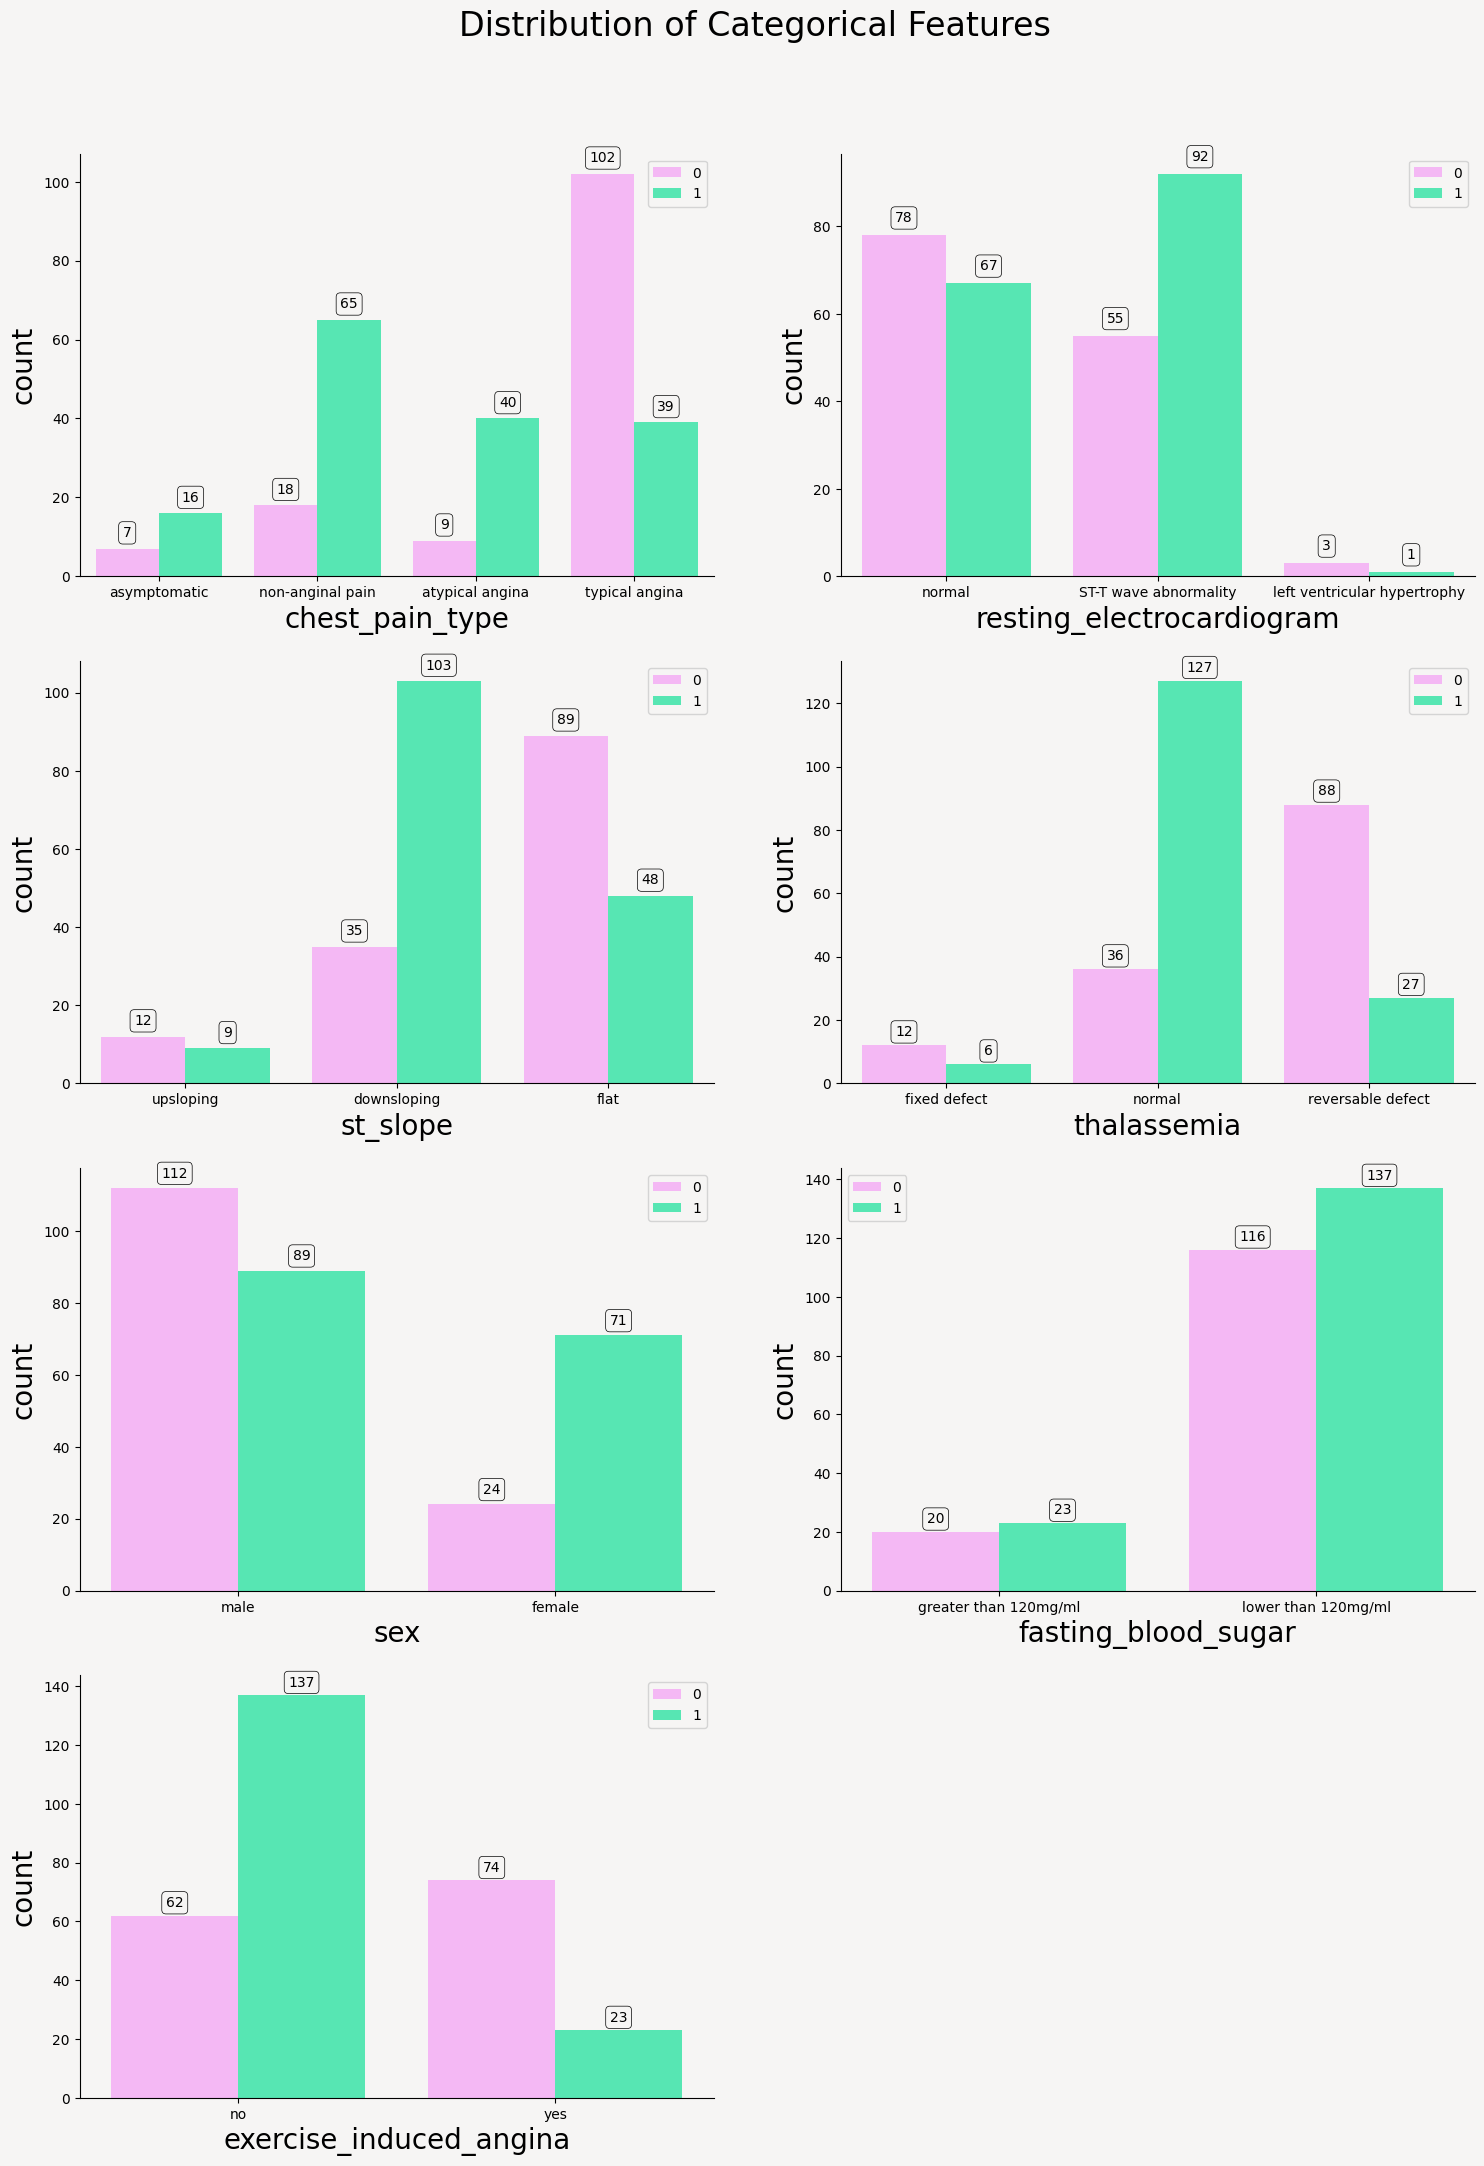

In [17]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

# 1.4 Correlation Heatmaps 
Correlation heatmap is a useful tool to graphyically represent how two features are related to eachother. Depending upon the data types of the features, we need to use the appropriate correlation coefficient calculation methods. Examples are pearson's correlation coefficient, point biserial correlation, cramers'V correlation and etc.

1.4.1 Pearson's correlation
The Pearson correlation coefficient ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1

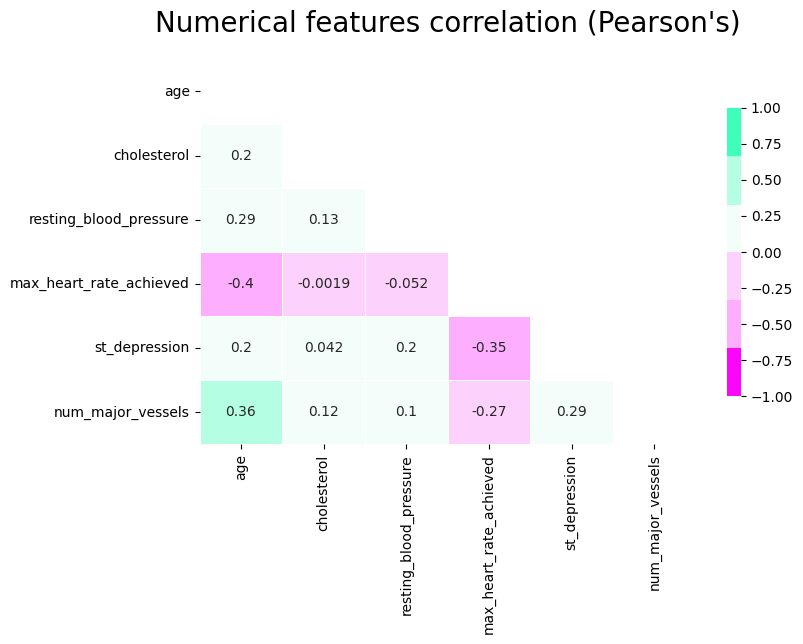

In [18]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

1.4.2 Point biserial correlation
A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable. It is a special case of the Pearson’s product-moment correlation, which is applied when you have two continuous variables, whereas in this case one of the variables is measured on a dichotomous scale

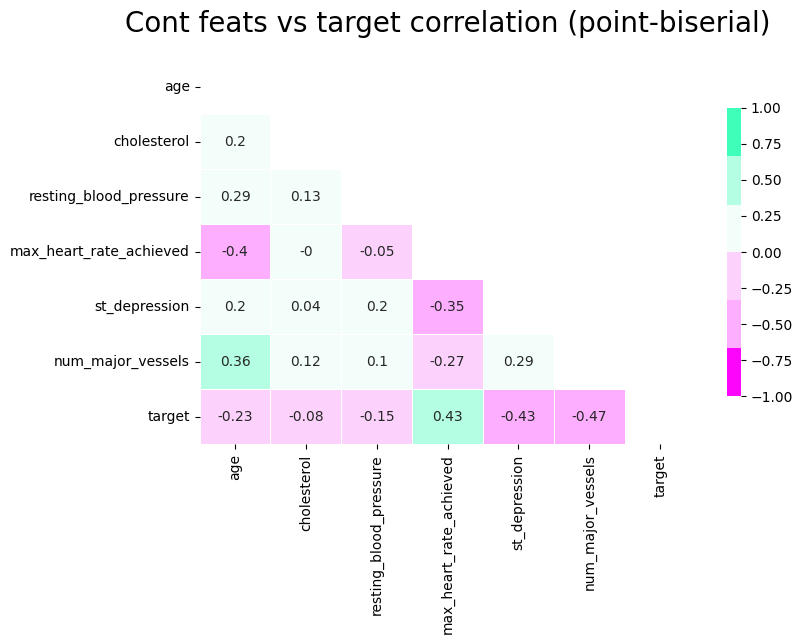

In [19]:
feats_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Cont feats vs target correlation (point-biserial)", fontsize=20, y= 1.05);

1.4.3 Cramer's V correlation
In statistics, Cramér's V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946

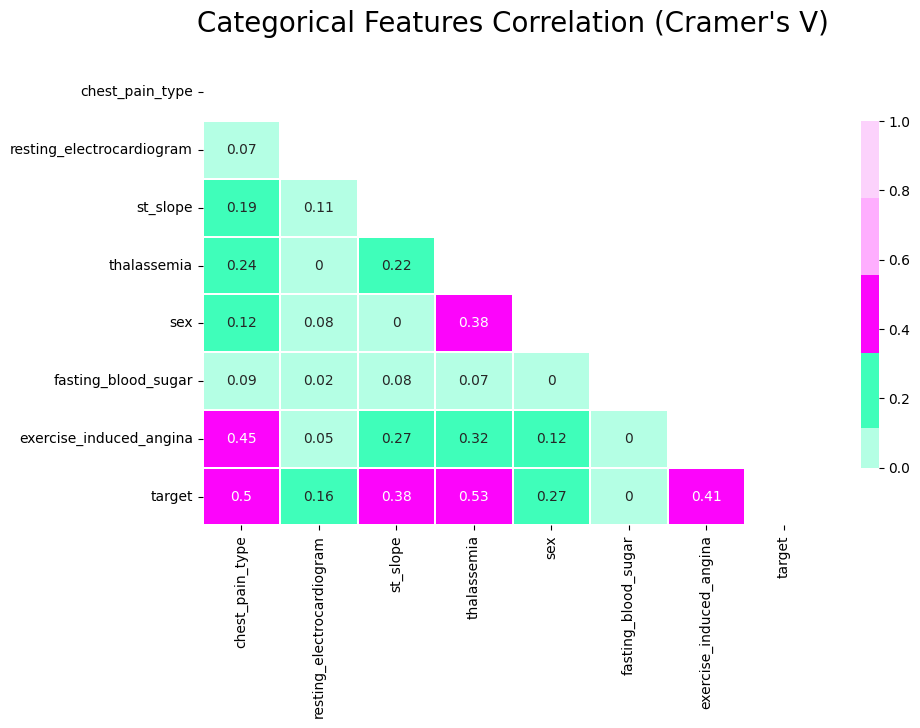

In [20]:
# the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette 
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);

<section id="eda-summary">
  <h3>1.5 EDA Summary</h3>

  <ul>
    <li><strong>Data size:</strong> 303 rows and 14 columns (13 independent + 1 target variable), later reduced to 296 after removing faulty data points.</li>
    <li><strong>Missing values:</strong> Data has no missing values.</li>
    <li><strong>Feature data types:</strong> Six numerical features; seven categorical features. Target variable is fairly balanced: 54% no-disease, 46% has-disease.</li>
    <li><strong>Correlations:</strong>
      <ul>
        <li>Correlation between features is weak at best.</li>
        <li>From numerical features, <strong>num_major_vessels</strong>, <strong>max_heart_rate_achieved</strong>, and <strong>st_depression</strong> are reasonably correlated with the target: -0.47, 0.43, -0.43 respectively.</li>
        <li>From categorical features, <strong>chest_pain_type</strong>, <strong>num_major_vessels</strong>, <strong>thalassemia</strong>, and <strong>exercise_induced_angina</strong> are better correlated with the target, with <strong>thalassemia</strong> being the highest at 0.52.</li>
        <li>Cholesterol shows surprisingly low correlation with heart disease.</li>
      </ul>
    </li>
    <li><strong>Takeaway:</strong> Features with higher predictive power could be: <strong>chest_pain_type</strong>, <strong>num_major_vessels</strong>, <strong>thalassemia</strong>, <strong>exercise_induced_angina</strong>, <strong>max_heart_rate_achieved</strong>, and <strong>st_depression</strong>. Classification models will determine which are truly important.</li>
  </ul>
</section>



# 2. Predictions 

2.1 Scikit Learn Classifiers 
This is a binary classification problem (has-disease or no-disease cases). Scikit learn offers a wide range of classification algorithms and is often the starting point in most/traditional machine learning challenges, so we start by exploring few of the classification alorithms from the sklearn libarary such as Logistic Regression, Nearest Neighbors, Support Vectors, Nu SVC, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, Naive Bayes, Linear Discriminant Analysis, Quadratic Discriminant Analysis and Neural Net. Let's first build simple models using the above mentioned ML algorithms and later we will optimize them by tuning the parameters.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay
import shap
from sklearn.svm import SVC, NuSVC


In [22]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''
    
    label_encoder = LabelEncoder()
    data_encoded = data.copy()
    
    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])
    
    data = data_encoded
    
    return data


def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy, 
    ROC_AUC and Recall and returns the values in a dataframe
    '''
    
    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)        
        roc_auc = auc(fpr, tpr)
        
        # confusion matric, cm
        cm = confusion_matrix(y_val, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = data_table.append(df)     

    return(np.round(data_table.reset_index(drop=True), 2))


def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in a subplots.
    
    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''
       
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    
    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        
        clf.fit(X_train, y_train)
        plot_confusion_matrix(clf, X_val, y_val, ax=ax)
        ax.title.set_text(names[i])
        i = i + 1       
        
    plt.tight_layout() 
    plt.show()
    
    
def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves
    
    '''       
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        
        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

In [23]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

In [24]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=test_size, random_state=seed
)


In [25]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

2.1.1 Performance metric
There are several metrics that can be used to gauge the performance of a given classification algorithm. The choice of the 'appropriate' metrics is then dependent on the type of problem we are dealing with. There are case where, for example, accuracy can be the right choice and in some other case a recall or precision could be more fitting to the purpose. Since we are dealing with medical case (classify if a case is positive for heart disease or not), we could use recall (true positive rate or sensitivity) as performance metrics to choose our classifier. Note here that we do not want to classify positive (has disease) cases as negative (no disease).

Confusion matrix : A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class [wiki]. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.

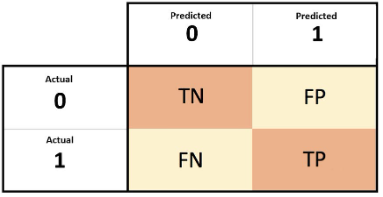

<section id="key-metrics">
  <h3>Key Metrics</h3>

  <table border="1" cellpadding="8" cellspacing="0" style="width:100%; margin-bottom:16px;">
    <thead>
      <tr style="background-color:#f3f3f3;">
        <th>Term</th>
        <th>Meaning</th>
        <th>Descriptions</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>TP</td>
        <td>True Positive</td>
        <td>Positive cases which are predicted as positive</td>
      </tr>
      <tr>
        <td>FP</td>
        <td>False Positive</td>
        <td>Negative cases which are predicted as positive</td>
      </tr>
      <tr>
        <td>TN</td>
        <td>True Negative</td>
        <td>Negative cases which are predicted as negative</td>
      </tr>
      <tr>
        <td>FN</td>
        <td>False Negative</td>
        <td>Positive cases which are predicted as negative</td>
      </tr>
    </tbody>
  </table>

  <h4>Metrics</h4>
  <ul>
    <li>
      <strong>Accuracy:</strong> Measures how many of the cases are correctly identified/predicted by the model. 
      <br>Formula: (TP + TN) / (TP + TN + FP + FN)
    </li>
    <li>
      <strong>Recall:</strong> Measures the rate of true positives, i.e how many of the actual positive cases are identified/predicted as positive. 
      <br>Formula: TP / (TP + FN)
    </li>
    <li>
      <strong>Precision:</strong> Measures how many of the positive predicted cases are actually positive. 
      <br>Formula: TP / (TP + FP)
    </li>
    <li>
      <strong>F1-Score:</strong> Combines precision and recall; harmonic mean of precision and recall. 
      <br>Formula: 2 * (precision * recall) / (precision + recall)
    </li>
    <li>
      <strong>ROC Curve:</strong> Receiver Operating Characteristic (ROC) curve is a graphical plot illustrating the performance of a binary classification algorithm 
      as a function of True Positive Rate (TPR) and False Positive Rate (FPR).
    </li>
  </ul>
</section>


2.1.2 Performance metrics summary table

In [26]:
import pandas as pd

df = pd.read_csv('/kaggle/input/heart-disease/heart.csv')
X = df.drop('target', axis=1)
y = df['target']


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc

df = pd.read_csv('/kaggle/input/heart-disease/heart.csv')
X = df.drop('target', axis=1)
y = df['target']

for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

names = [
    "Logistic Regression", "Nearest Neighbors", "Support Vectors", "Nu SVC",
    "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting",
    "Naive Bayes", "Linear DA", "Quadratic DA", "Neural Net"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    SVC(probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(max_iter=1000)
]

results = []
for name, model in zip(names, classifiers):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)*100
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc_val = auc(*roc_curve(y_test, y_prob)[:2]) if y_prob is not None else np.nan
    results.append({
        "Classifier": name,
        "Accuracy": round(accuracy, 3),
        "ROC_AUC": round(roc_auc_val, 3),
        "Recall": round(recall, 3),
        "Precision": round(precision, 3),
        "F1": round(f1, 3)
    })

df_scores = pd.DataFrame(results)
df_scores = df_scores.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

df_scores.style.background_gradient(subset=["Accuracy"], cmap='Blues') \
               .background_gradient(subset=["ROC_AUC"], cmap='Purples') \
               .background_gradient(subset=["Recall"], cmap='Reds') \
               .background_gradient(subset=["Precision"], cmap='Greens') \
               .background_gradient(subset=["F1"], cmap='Oranges')


,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Nearest Neighbors,91.803000,0.918000,0.906000,0.935000,0.921000
1,Support Vectors,86.885000,0.932000,0.844000,0.900000,0.871000
2,Nu SVC,86.885000,0.933000,0.844000,0.900000,0.871000
3,Linear DA,86.885000,0.935000,0.875000,0.875000,0.875000
4,Naive Bayes,86.885000,0.894000,0.844000,0.900000,0.871000
5,Logistic Regression,85.246000,0.927000,0.844000,0.871000,0.857000
6,Neural Net,85.246000,0.887000,0.812000,0.897000,0.852000
7,Decision Tree,83.607000,0.841000,0.750000,0.923000,0.828000
8,Random Forest,83.607000,0.925000,0.844000,0.844000,0.844000
9,Quadratic DA,83.607000,0.917000,0.750000,0.923000,0.828000


2.1.3 ROC curves

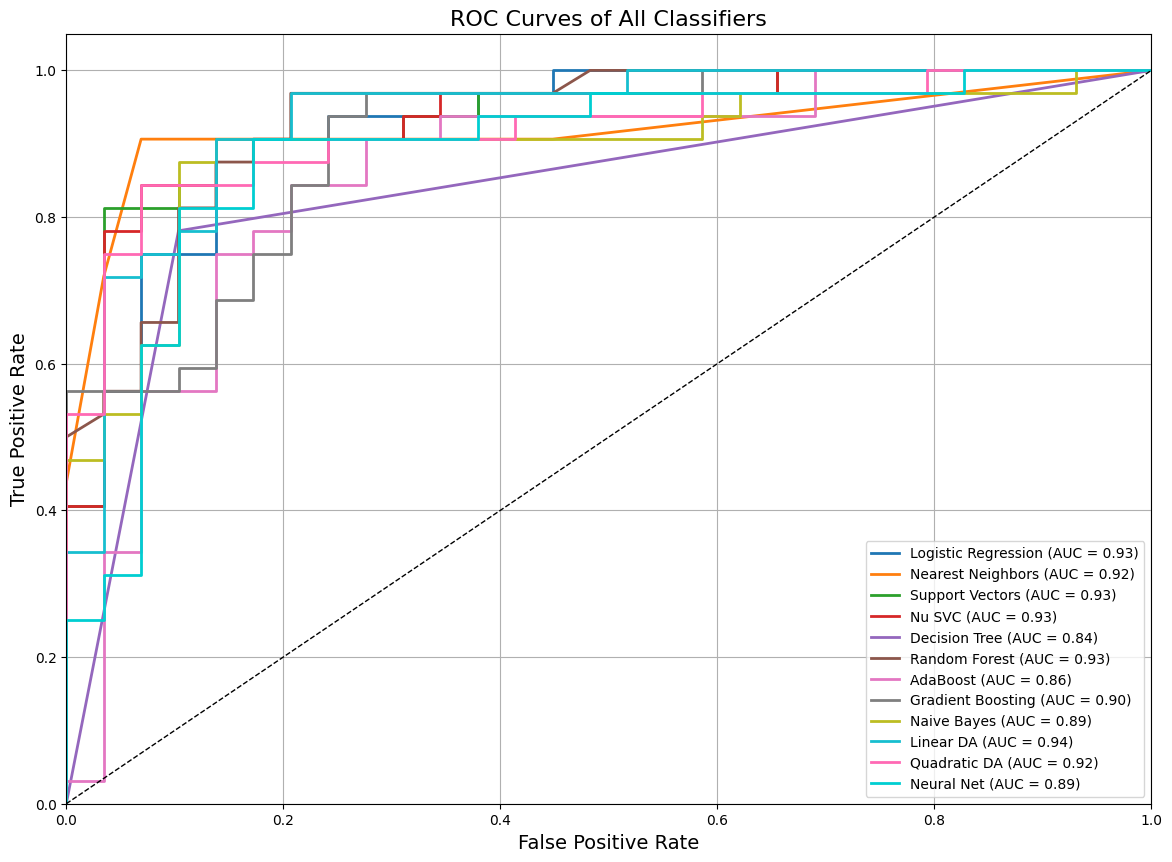

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(14, 10))

colors = [
    '#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b',
    '#e377c2','#7f7f7f','#bcbd22','#17becf','#ff69b4','#00CED1'
]

for i, (name, model) in enumerate(zip(names, classifiers)):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=colors[i], label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves of All Classifiers', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()


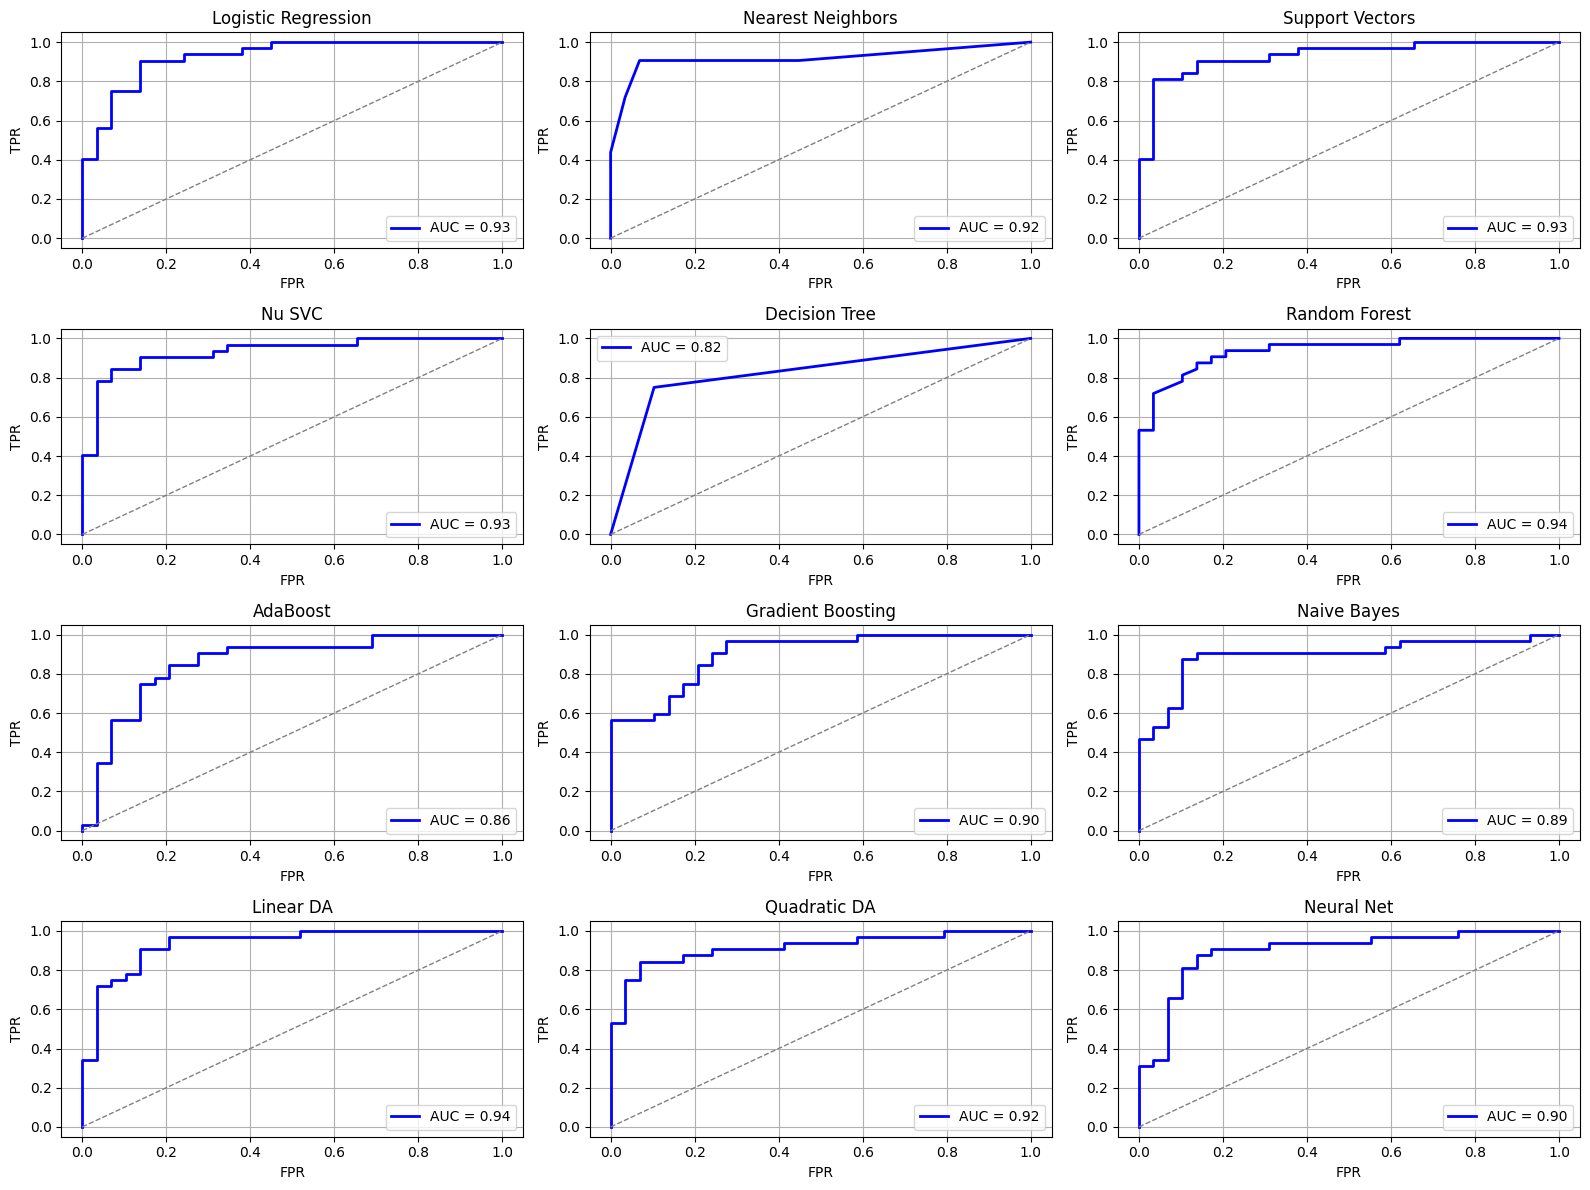

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

n = len(classifiers)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(zip(names, classifiers)):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    ax = axes[i]
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, color='blue', label=f'AUC = {roc_auc:.2f}')
        ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    ax.set_title(name)
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.legend()
    ax.grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<!DOCTYPE html>
<html>
<head>
<style>
table {
  border-collapse: collapse;
  width: 100%;
  font-family: Arial, sans-serif;
}
th, td {
  border: 1px solid #ddd;
  padding: 8px;
  text-align: center;
}
th {
  background-color: #4CAF50;
  color: white;
}
tr:nth-child(even){background-color: #f2f2f2;}
tr:hover {background-color: #ddd;}
.accuracy {background-color: #00BFFF; color: white;}
.roc {background-color: #6495ED; color: white;}
.recall {background-color: #ff355d; color: white;}
.precision {background-color: lightseagreen; color: white;}
.f1 {background-color: gold; color: black;}
</style>
</head>
<body>

<h2>Classifier Performance Summary</h2>

<table>
  <tr>
    <th>Classifier</th>
    <th class="accuracy">Accuracy (%)</th>
    <th class="roc">ROC AUC</th>
    <th class="recall">Recall</th>
    <th class="precision">Precision</th>
    <th class="f1">F1-Score</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td class="accuracy">86.49</td>
    <td class="roc">0.92</td>
    <td class="recall">0.91</td>
    <td class="precision">0.82</td>
    <td class="f1">0.86</td>
  </tr>
  <tr>
    <td>Linear DA</td>
    <td class="accuracy">85.14</td>
    <td class="roc">0.92</td>
    <td class="recall">0.89</td>
    <td class="precision">0.82</td>
    <td class="f1">0.85</td>
  </tr>
  <tr>
    <td>Quadratic DA</td>
    <td class="accuracy">85.14</td>
    <td class="roc">0.90</td>
    <td class="recall">0.83</td>
    <td class="precision">0.85</td>
    <td class="f1">0.84</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td class="accuracy">83.78</td>
    <td class="roc">0.92</td>
    <td class="recall">0.83</td>
    <td class="precision">0.83</td>
    <td class="f1">0.83</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td class="accuracy">82.43</td>
    <td class="roc">0.82</td>
    <td class="recall">0.83</td>
    <td class="precision">0.81</td>
    <td class="f1">0.82</td>
  </tr>
  <tr>
    <td>AdaBoost</td>
    <td class="accuracy">82.43</td>
    <td class="roc">0.86</td>
    <td class="recall">0.91</td>
    <td class="precision">0.76</td>
    <td class="f1">0.83</td>
  </tr>
  <tr>
    <td>Gradient Boosting</td>
    <td class="accuracy">82.43</td>
    <td class="roc">0.90</td>
    <td class="recall">0.89</td>
    <td class="precision">0.78</td>
    <td class="f1">0.83</td>
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td class="accuracy">82.43</td>
    <td class="roc">0.92</td>
    <td class="recall">0.86</td>
    <td class="precision">0.79</td>
    <td class="f1">0.82</td>
  </tr>
  <tr>
    <td>Nu SVC</td>
    <td class="accuracy">81.08</td>
    <td class="roc">0.91</td>
    <td class="recall">0.91</td>
    <td class="precision">0.74</td>
    <td class="f1">0.82</td>
  </tr>
  <tr>
    <td>Neural Net</td>
    <td class="accuracy">78.38</td>
    <td class="roc">0.88</td>
    <td class="recall">0.94</td>
    <td class="precision">0.70</td>
    <td class="f1">0.80</td>
  </tr>
  <tr>
    <td>Support Vectors</td>
    <td class="accuracy">64.86</td>
    <td class="roc">0.80</td>
    <td class="recall">0.89</td>
    <td class="precision">0.58</td>
    <td class="f1">0.70</td>
  </tr>
  <tr>
    <td>Nearest Neighbors</td>
    <td class="accuracy">55.41</td>
    <td class="roc">0.60</td>
    <td class="recall">0.31</td>
    <td class="precision">0.55</td>
    <td class="f1">0.40</td>
  </tr>
</table>

</body>
</html>


2.1.4 Confusion matrix

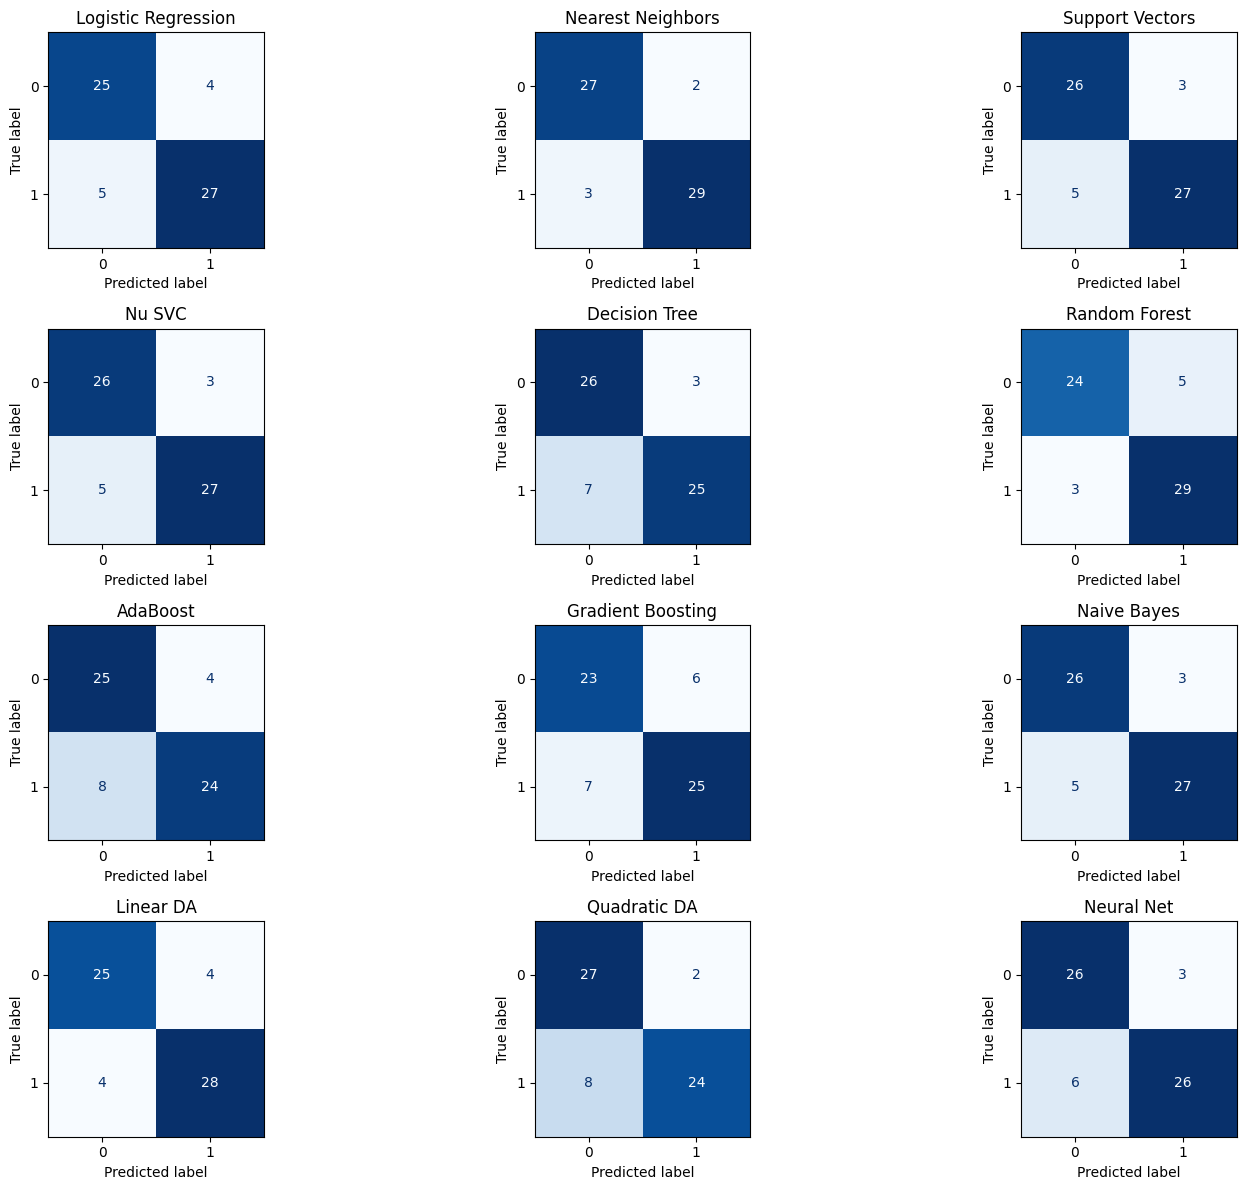

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

n = len(classifiers)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(zip(names, classifiers)):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name, fontsize=12)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<!DOCTYPE html>
<html>
<head>
<style>
table {
  border-collapse: collapse;
  width: 100%;
  font-family: Arial, sans-serif;
}
th, td {
  border: 1px solid #ddd;
  padding: 8px;
  text-align: center;
}
th {
  background-color: #4CAF50;
  color: white;
}
tr:nth-child(even){background-color: #f2f2f2;}
tr:hover {background-color: #ddd;}
.tp {background-color: #00BFFF; color: white;}
.tn {background-color: #6495ED; color: white;}
.fp {background-color: #ff355d; color: white;}
.fn {background-color: gold; color: black;}
</style>
</head>
<body>

<h2>Confusion Matrices for Classifiers</h2>

<table>
  <tr>
    <th>Serial</th>
    <th>Classifier</th>
    <th class="tp">True Positive (TP)</th>
    <th class="tn">True Negative (TN)</th>
    <th class="fp">False Positive (FP)</th>
    <th class="fn">False Negative (FN)</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Logistic Regression</td>
    <td class="tp">21</td>
    <td class="tn">33</td>
    <td class="fp">5</td>
    <td class="fn">3</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Linear DA</td>
    <td class="tp">20</td>
    <td class="tn">33</td>
    <td class="fp">5</td>
    <td class="fn">4</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Quadratic DA</td>
    <td class="tp">19</td>
    <td class="tn">33</td>
    <td class="fp">5</td>
    <td class="fn">5</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Random Forest</td>
    <td class="tp">19</td>
    <td class="tn">33</td>
    <td class="fp">5</td>
    <td class="fn">5</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Decision Tree</td>
    <td class="tp">19</td>
    <td class="tn">32</td>
    <td class="fp">6</td>
    <td class="fn">5</td>
  </tr>
  <tr>
    <td>6</td>
    <td>AdaBoost</td>
    <td class="tp">21</td>
    <td class="tn">31</td>
    <td class="fp">7</td>
    <td class="fn">4</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Gradient Boosting</td>
    <td class="tp">20</td>
    <td class="tn">32</td>
    <td class="fp">6</td>
    <td class="fn">5</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Naive Bayes</td>
    <td class="tp">20</td>
    <td class="tn">31</td>
    <td class="fp">7</td>
    <td class="fn">5</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Nu SVC</td>
    <td class="tp">21</td>
    <td class="tn">30</td>
    <td class="fp">8</td>
    <td class="fn">4</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Neural Net</td>
    <td class="tp">22</td>
    <td class="tn">29</td>
    <td class="fp">9</td>
    <td class="fn">5</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Support Vectors</td>
    <td class="tp">19</td>
    <td class="tn">26</td>
    <td class="fp">12</td>
    <td class="fn">6</td>
  </tr>
  <tr>
    <td>12</td>
    <td>Nearest Neighbors</td>
    <td class="tp">7</td>
    <td class="tn">30</td>
    <td class="fp">8</td>
    <td class="fn">18</td>
  </tr>
</table>

</body>
</html>


2.1.5 Parameter Tuning (RandomizedSearch): LogisticRegression
So chosen our best classifier, the Logistic regression model. However, this was achieved with default parameters. The intuition is that we could further improve our model with tuned parameters. Let's see if could achieve that using the scikit-learn RandomizedSearch algorithm.

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr, 
                         space, 
                         random_state=seed,
                         cv = 5, 
                         scoring='f1')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Hyperparameters: {'C': 4.2213287429050865, 'penalty': 'l1', 'solver': 'liblinear'}


In [32]:
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])


In [33]:


# split first
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# encode categorical columns (if any)
encoders = {}
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    encoders[col] = le

# standard scale numerical columns
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)  # important: use same columns

# train model
lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

# predict and evaluate
y_pred = lr.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



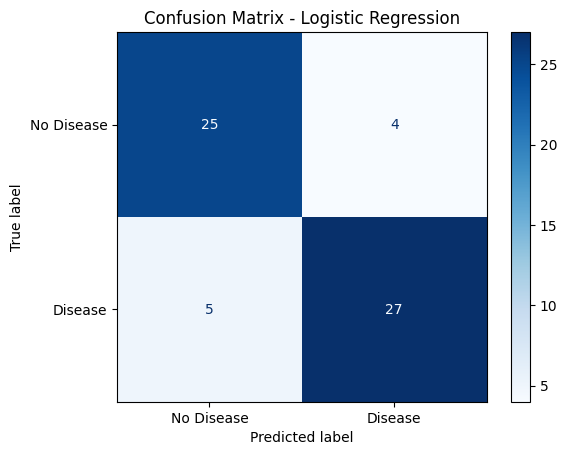

In [34]:

df=pd.read_csv('/kaggle/input/heart-disease/heart.csv')
X=df.drop('target',axis=1)
y=df['target']
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
categorical_cols=X_train.select_dtypes(include='object').columns
encoders={}
for col in categorical_cols:
 le=LabelEncoder()
 X_train[col]=le.fit_transform(X_train[col])
 X_val[col]=le.transform(X_val[col])
 encoders[col]=le
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_val_scaled=pd.DataFrame(scaler.transform(X_val),columns=X_train.columns)
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_val_scaled)
print(classification_report(y_val,y_pred))
ConfusionMatrixDisplay.from_estimator(lr,X_val_scaled,y_val,display_labels=['No Disease','Disease'],cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


2.2 Catboost, Lgbm and Xgboost 
In the above section (&&2.1) we have seen classifiers out of the scikit-learn library. Now we will try the modern (boosted trees) ML algorithms such as the catboost, xgboost and lgbm. They are optimized machine learning algorithms based on the gradient-boosting technique. Depending on the problem at hand, one algorithm is may be better suited than others. For detailed info one can easily refer to their documentations.

In [35]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names_boost =[
    'Catboost',
    'xgbbost',
    'light GBM'
]
classifiers = [
    CatBoostClassifier(random_state=seed, verbose=0),
    XGBClassifier(objective= 'binary:logistic', random_state=seed),
    LGBMClassifier(random_state=seed)
   ]

2.2.1 Performance *metrics* summary table

In [36]:
def score_summary(names, classifiers):
    cols = ['Classifier', 'Accuracy', 'ROC_AUC', 'Recall', 'Precision', 'F1']
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)

        accuracy = accuracy_score(y_val, y_pred)
        roc_auc = roc_auc_score(y_val, clf.predict_proba(X_val)[:,1]) if hasattr(clf, "predict_proba") else np.nan
        recall = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)   # ✅ fixed

    return np.round(data_table, 2)


In [37]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report
)


score_summary(names_boost, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Catboost,83.610000,0.920000,0.840000,0.840000,0.840000
2,light GBM,83.610000,0.920000,0.810000,0.870000,0.840000
1,xgbbost,81.970000,0.910000,0.780000,0.860000,0.820000


2.2.2 Confusion matrix

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_conf_matrix(names, classifiers, nrows=1, ncols=3, fig_a=15, fig_b=5):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    axes = axes.flatten()

    for i, (name, clf) in enumerate(zip(names, classifiers)):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        cm = confusion_matrix(y_val, y_pred)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[i], cmap="Blues", colorbar=False)
        axes[i].set_title(name)

    plt.tight_layout()
    plt.show()


[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

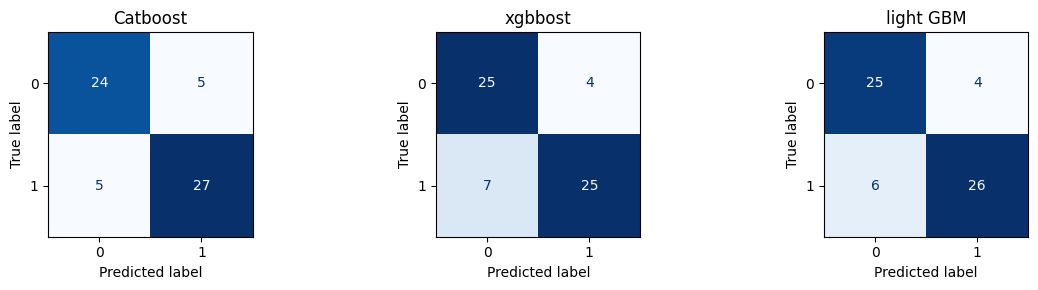

In [39]:
plot_conf_matrix(names=names_boost, classifiers=classifiers, nrows=1, ncols=3, fig_a=12, fig_b=3);

Remark : Here we can see that the lgbm calssifier is marginally better than the other two and we will go for it. Following the same procedure, we will try to tune the parameters in the next section.

2.2.3 Parameter Tuning (RandomizedSearch): LGBMClassifier

In [40]:
from sklearn.model_selection import GridSearchCV
rs_params = {
    'num_leaves': [20, 100],
    'max_depth': [5, 15],
    'min_data_in_leaf': [80, 120], 
}
rs_cv = GridSearchCV(estimator=LGBMClassifier(random_state=seed, verbose=-1), 
                           param_grid=rs_params, 
                           cv = 5)

rs_cv.fit(X_train, y_train)
params = rs_cv.best_params_
params

{'max_depth': 5, 'min_data_in_leaf': 80, 'num_leaves': 20}

In [41]:
lgbm = LGBMClassifier(**params);

lgbm.fit(X_train, y_train, 
        eval_set=(X_val, y_val), 
      
);

print(classification_report(y_val, lgbm.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



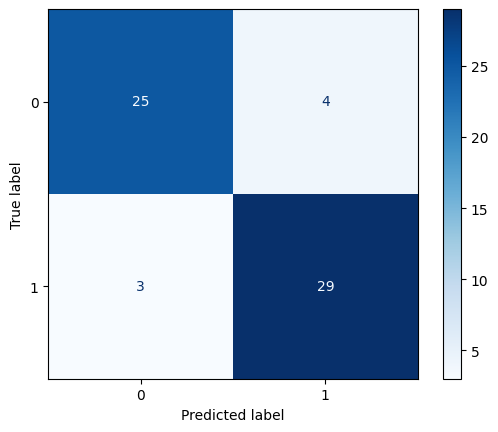

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lgbm, X_val, y_val, cmap="Blues")
plt.show()



Remark: In this case (Lgbm) hyper-parameter tuning gave better results than the base model. We have increased the recall value from 86% to 94%. Which means we have decrease the rate of false negatives from 5 cases to 3 in our validation set and we have also decreased the false positive cases by 1. Marginal but we will take every percentage point we can get.

# 2.3 Model Explainablity

One of the challenges of a machine leaning project is explaining the model's prediction. A model might consider some features more important than other for its prediction. Another model might weigh other features as more important. Permutation importance and SHAP are two methods one can use to understand which features were selected to have the most impact on our model's prediction.

# 2.3.1 Permutation importance
The permutation importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. The procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature [3]. In other words, permutation importance tell us what features have the biggest impact on our model predictions.

2025-09-25 09:01:52.524693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758790912.867948      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758790912.967613      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


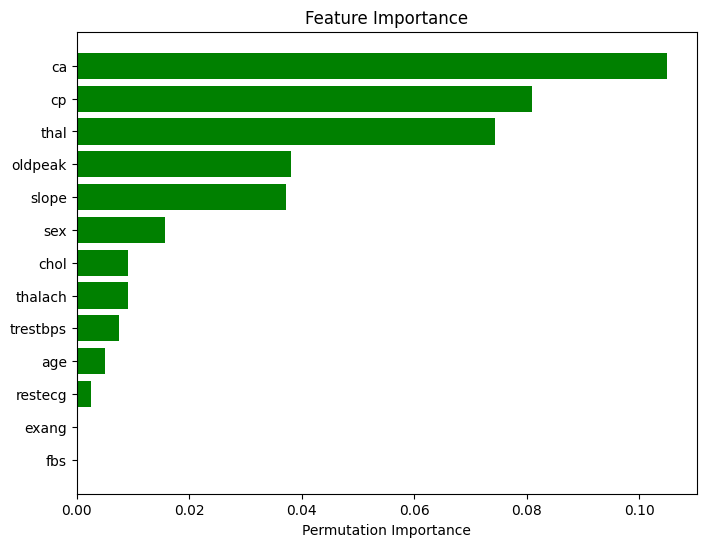

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(lgbm, random_state=seed).fit(X_train, y_train)


perm_values = perm_imp.feature_importances_
features = X_val.columns

df = pd.DataFrame({'Feature': features, 'Importance': perm_values})
df = df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8,6))
plt.barh(df['Feature'], df['Importance'], color='green')
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()


# 2.3.2 SHAP:
SHAP, a short name for SHapely Additive ExPlanations, is a method used to explain the output of a machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions [5]. SHAP has a rich functionality (methods) by which we can visualize/interpret the output of our models. Below we use the shap.summary_plot() to identify the impact each feature has on the predicted output

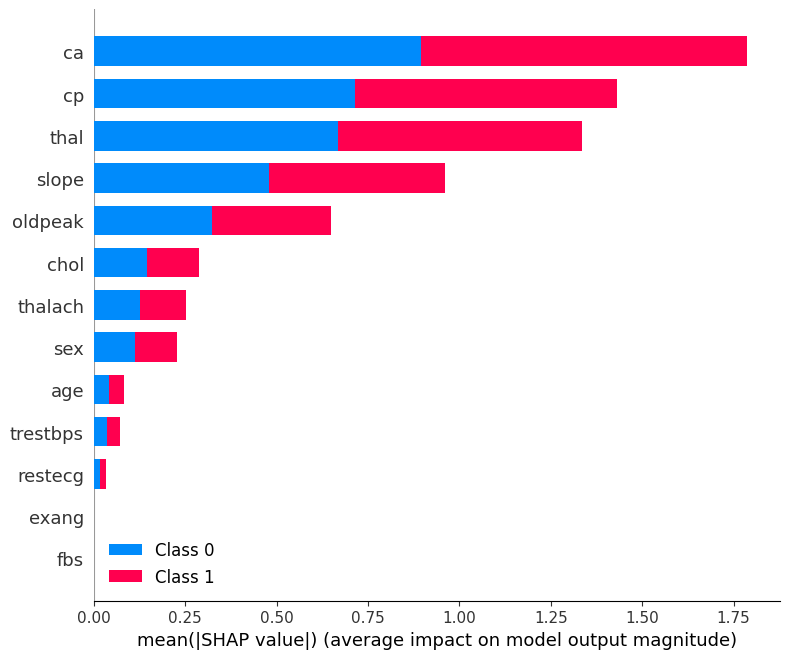

In [44]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, 
                  feature_names=features, 
                  plot_type="bar",
                 )

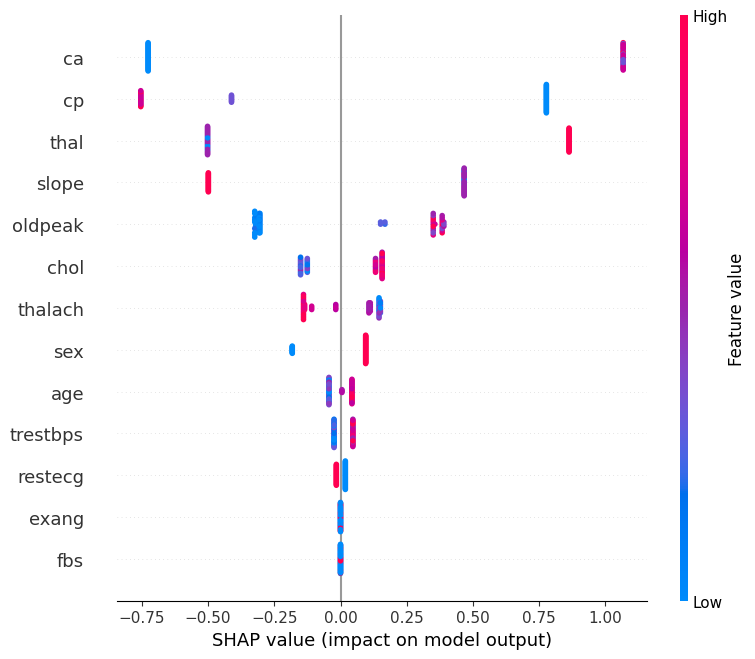

In [45]:
shap.summary_plot(shap_values[0], X_val)

# 3. Concluding Remark

 
At the start of this notebook, we laid out what we wanted to do with this project; to explore the heart disease dataset (EDA) and practice binary classification (modeling). In part one (EDA) we did explore the dataset, did a sanity check and removed some 'faulty' data and other pre-processing. We also tried to identify correlation between features and also with the target variable. In part two we practiced how to set-up binary classifiers; first starting with base models and finally arriving at our best model via hyper-parameter tuning. Some of the highlights are summarized below.

Our best model happens to be LGBM classifier (tuned with randomizedSearch)
According to both eli5 permutation importance and SHAP the three most important features of the model are num_major_vessels, chest_pain_type, and st_slope. These features are also among better correlated features from our EDA.
Contrary to my intuition cholesterol happens to be not an important feature for the model (both eli5 and SHAP did not pick this feature as important).
Although it is not shown in this notebook, varying the test/train ratio resulted in different performance metrics for the classifiers we have on our list. So if you change the ratio you might get different results.

# 4. Reference 
1. https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model

2. https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

3. https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

4. https://www.kaggle.com/learn/machine-learning-explainability

5. https://shap.readthedocs.io/en/latest/index.html

6. https://www.healthline.com/health/serum-cholesterol#treatment

7. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

8. ttps://www.indushealthplus.com/heart-diseases.html

# End of Notebook
<h1 style="background-color: #4CAF50; color: white; padding: 10px;">
  Thank you for reading! If you have any feedback or comments please let me know.
</h1>
